In [11]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,LabelEncoder
import matplotlib.pyplot as plt


In [3]:
data = pd.read_csv(r'D:\priya\Steel_industry_data.csv') 
data

,date,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM,WeekStatus,Day_of_week,Load_Type
0,01/01/2018 00:15,3.17,2.95,0.00,0.0,73.21,100.00,900,Weekday,Monday,Light_Load
1,01/01/2018 00:30,4.00,4.46,0.00,0.0,66.77,100.00,1800,Weekday,Monday,Light_Load
2,01/01/2018 00:45,3.24,3.28,0.00,0.0,70.28,100.00,2700,Weekday,Monday,Light_Load
3,01/01/2018 01:00,3.31,3.56,0.00,0.0,68.09,100.00,3600,Weekday,Monday,Light_Load
4,01/01/2018 01:15,3.82,4.50,0.00,0.0,64.72,100.00,4500,Weekday,Monday,Light_Load
...,...,...,...,...,...,...,...,...,...,...,...
35035,31/12/2018 23:00,3.85,4.86,0.00,0.0,62.10,100.00,82800,Weekday,Monday,Light_Load
35036,31/12/2018 23:15,3.74,3.74,0.00,0.0,70.71,100.00,83700,Weekday,Monday,Light_Load
35037,31/12/2018 23:30,3.78,3.17,0.07,0.0,76.62,99.98,84600,Weekday,Monday,Light_Load
35038,31/12/2018 23:45,3.78,3.06,0.11,0.0,77.72,99.96,85500,Weekday,Monday,Light_Load


In [6]:
data['date'] = pd.to_datetime(data['date'])
data['hour'] = data['date'].dt.hour
data['day_of_month'] = data['date'].dt.day
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year
data = data.drop(['date'], axis=1)

In [7]:
X = data.drop('Usage_kWh', axis=1) 
y = data['Usage_kWh'] 

In [9]:
numeric_columns = X.select_dtypes(include=['number']).columns
X[numeric_columns] = X[numeric_columns].fillna(X[numeric_columns].mean())

In [12]:
categorical_columns = X.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
pca = PCA(n_components=2) 
X_pca = pca.fit_transform(X_scaled)

In [16]:
explained_variance_ratio = pca.explained_variance_ratio_
print(f"Explained Variance Ratio: {explained_variance_ratio}")
print(f"Cumulative Variance Explained: {np.cumsum(explained_variance_ratio)}")

Explained Variance Ratio: [0.30241698 0.23794064]
Cumulative Variance Explained: [0.30241698 0.54035762]


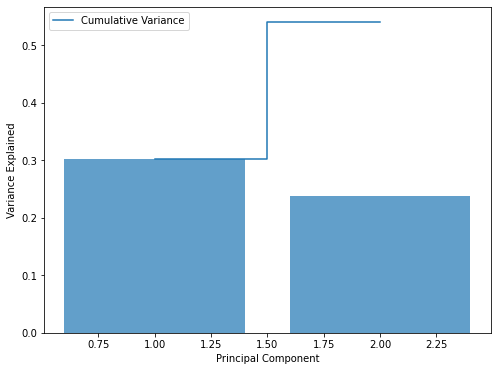

In [17]:
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, align='center')
plt.step(range(1, len(explained_variance_ratio) + 1), np.cumsum(explained_variance_ratio), where='mid', label='Cumulative Variance')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.legend(loc='best')
plt.show()

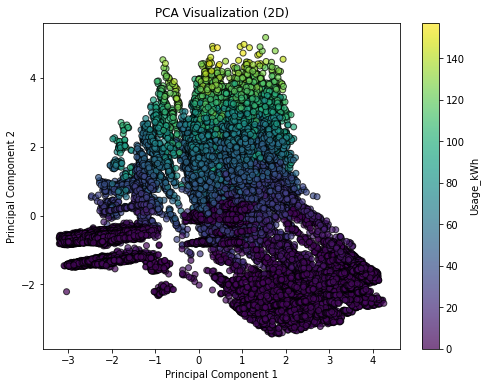

In [18]:
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', alpha=0.7)
plt.title('PCA Visualization (2D)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Usage_kWh')
plt.show()

In [19]:
data_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
data_pca['Usage_kWh'] = y.reset_index(drop=True)
print(data_pca.head())

        PC1       PC2  Usage_kWh
0 -2.468109 -0.730318       3.17
1 -2.597937 -0.703125       4.00
2 -2.501879 -0.723617       3.24
3 -2.469258 -0.704846       3.31
4 -2.529279 -0.684137       3.82
